In [9]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.feature_map import ChebRx
from squlearn.expectation_operator import IsingHamiltonian
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.qnn.qnn import QNN
from squlearn.optimizers import SLSQP
from qiskit.providers.fake_provider import FakeManilaV2

In [10]:
executor = Executor(FakeManilaV2())

Define parameterized quantum circuit $Q(x,\theta)$

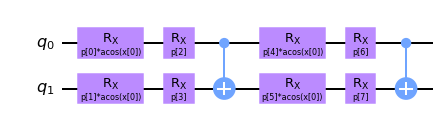

In [11]:
nqubits = 3

number_of_layers = 2
pqc = ChebRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw()

Definition of the cost operator:
$\hat{H} = J \sum\limits_{i < j} Z_i Z_j + h\sum\limits_i Z_i + c$

In [12]:
ising_op = IsingHamiltonian(nqubits, I="S", Z="S", ZZ="S")
print(ising_op)

SummedOp([
  1.0*p[0] * II,
  1.0*p[1] * IZ,
  1.0*p[1] * ZI,
  1.0*p[2] * ZZ
])


Example function: $log(x)$

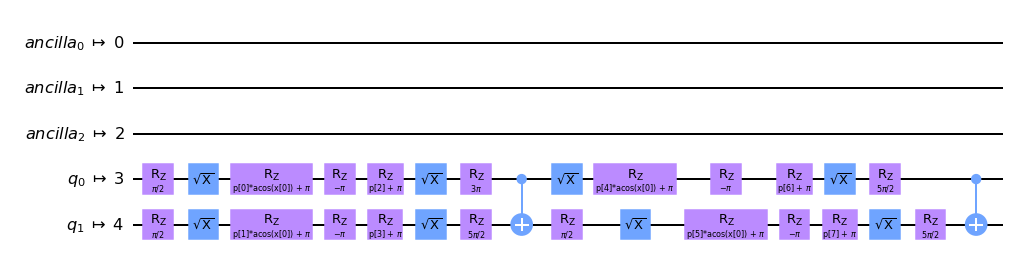

In [13]:
qnn = QNN(pqc, IsingHamiltonian(nqubits), executor)
qnn.pqc.draw()

In [14]:
qnn.get_param()

{'num_qubits': 2,
 'num_layers': 2,
 'closed': False,
 'I': 'S',
 'Z': 'F',
 'X': 'N',
 'ZZ': 'F'}

In [15]:
qnn.pqc.get_param()

{'num_qubits': 2, 'num_layers': 2, 'closed': False}

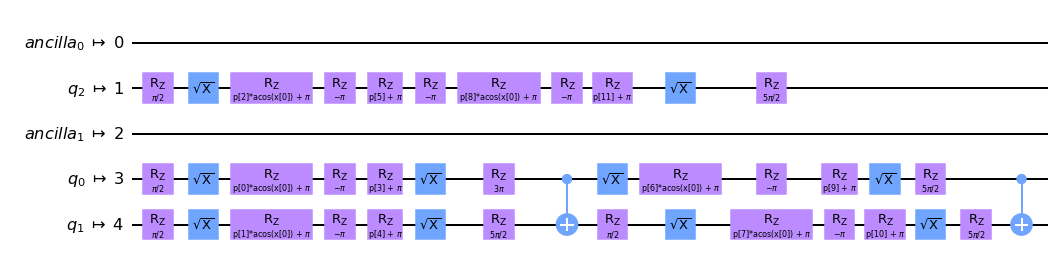

In [16]:
qnn.pqc.set_param(num_qubits=3)
qnn.pqc.draw()